# CMU Machine Learning with Large Datasets
## Homework 4 - Machine Learning at Scale

Note that we've included code that does data loading and preparation for you. You could take a brief look to learn about how to specify a schema when loading data, or just run them all and start from "Part B Begins" after adding your S3 bucket name to cmd 8.

Note that we will not be autograding this notebook because of the open-ended nature of it (although you will have to submit this notebook). To make grading easier and to learn about your thought process, throughout the notebook, we include questions you have to anwswer in your writeup. Whenver this happens, there is a ✰ symbol.

### 0. Start a Spark Session and Install Libraries

In [1]:
# You are highly recommended to select the "PySpark" kernel instead of python kernel,
# Otherwise you need to modify this cell to get pyspark working.

from pyspark.sql import *

sc = spark.sparkContext
print(f'num executors: {sc.getConf().get("spark.executor.instances")}')

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,User,Current session?
5,application_1667604076804_0006,pyspark,idle,,,None,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

num executors: 4

Throughout this assignment, you will be generating plots. `Matplotlib` and other useful Python libraries do not come pre-installed on the cluster. Therefore, you will have to ssh into your master node (think about why it should be the master) using your keypair created earlier and install `matplotlib`. You might have to do this later again for other libraries you use, e.g. `Pandas`.

Run the below cell to ensure you installation was successful. If an error occurs, you might want to double check your installation.

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

### 1. Data Loading and Preparation

Earlier, we have extracted relevant features from and converted format of the full raw Million Song Dataset. We now want to load our converted dataset from the S3 Storage.

Note that although you can load all chunks of the dataset using `*`, we recommend you only load in a subset while developing so that processing takes shorter time when you are just verifying your ideas. Be sure to add your own S3 bucket name to cmd 8.

In [3]:
from pyspark.sql.types import DoubleType, StringType, StructField, StructType

schema = StructType([StructField('song_hotttnesss', DoubleType(), True),
                       StructField('artist_familiarity', DoubleType(), True),
                       StructField('artist_hotttnesss', DoubleType(), True),
                       StructField('artist_id', StringType(), True),
                       StructField('artist_latitude', DoubleType(), True),
                       StructField('artist_location', StringType(), True),
                       StructField('artist_longitude', DoubleType(), True),
                       StructField('artist_name', StringType(), True),
                       StructField('title', StringType(), True),
                       StructField('danceability', DoubleType(), True),
                       StructField('duration', DoubleType(), True),
                       StructField('end_of_fade_in', DoubleType(), True),
                       StructField('energy', DoubleType(), True),
                       StructField('key', DoubleType(), True),
                       StructField('key_confidence', DoubleType(), True),
                       StructField('loudness', DoubleType(), True),
                       StructField('mode', DoubleType(), True),
                       StructField('mode_confidence', DoubleType(), True),
                       StructField('start_of_fade_out', DoubleType(), True),
                       StructField('tempo', DoubleType(), True),
                       StructField('time_signature', DoubleType(), True),
                       StructField('time_signature_confidence', DoubleType(), True),
                       StructField('artist_terms', StringType(), True),
                       StructField('artist_terms_freq', StringType(), True),
                       StructField('artist_terms_weight', StringType(), True),
                       StructField('year', DoubleType(), True)]
                   )

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [4]:
#--------------------------------------------------------------------
#Set to False after writing your code and run end-to-end on full data
#--------------------------------------------------------------------
load_subset = False
#----------------------------
#Add your s3 bucket name below:
#----------------------------
s3_bucket_name = 'mlld-million-song'

if load_subset:
    df = spark.read.format("csv")\
        .option("header", "false")\
        .option("nanValue", "nan")\
        .option("quote", "\"")\
        .option("escape", "\"")\
        .schema(schema)\
        .load(f"s3://{s3_bucket_name}/processed/A_1.csv")
else:
    df = spark.read.format("csv")\
        .option("header", "false")\
        .option("nanValue", "nan")\
        .option("quote", "\"")\
        .option("escape", "\"")\
        .schema(schema)\
        .load(f"s3://{s3_bucket_name}/processed/*.csv")

print('loaded {} records'.format(df.count()))

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

loaded 581965 records

Inspect the `df` we just created by running the below cell:

In [5]:
df.printSchema()
df.cache()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- song_hotttnesss: double (nullable = true)
 |-- artist_familiarity: double (nullable = true)
 |-- artist_hotttnesss: double (nullable = true)
 |-- artist_id: string (nullable = true)
 |-- artist_latitude: double (nullable = true)
 |-- artist_location: string (nullable = true)
 |-- artist_longitude: double (nullable = true)
 |-- artist_name: string (nullable = true)
 |-- title: string (nullable = true)
 |-- danceability: double (nullable = true)
 |-- duration: double (nullable = true)
 |-- end_of_fade_in: double (nullable = true)
 |-- energy: double (nullable = true)
 |-- key: double (nullable = true)
 |-- key_confidence: double (nullable = true)
 |-- loudness: double (nullable = true)
 |-- mode: double (nullable = true)
 |-- mode_confidence: double (nullable = true)
 |-- start_of_fade_out: double (nullable = true)
 |-- tempo: double (nullable = true)
 |-- time_signature: double (nullable = true)
 |-- time_signature_confidence: double (nullable = true)
 |-- artist_terms: string

<div align="center">
    <h1>------------------- Part B Begins ------------------- </h1>
</div>

### 2. Exploratory Data Analysis

Now we have our data mostly ready. It's a good time to take some deeper look to better understand what we are dealing with here.

First, show summary statistics of the features using `.summary()`. Hint: because we have many features, the output might be too long for a single line. The simplest way to resolve this mess is to copy paste the output to some editor (e.g. vscode) and check the result. Another way is you could select only a few features to print at a time so that things could fit into one line.

In [6]:
# YOUR CODE HERE
#df.summary().show()

# YOUR CODE HERE


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Now looking at the statistics, `danceability` and `energy` appear strange. ✰2.3(a) Explain why these features seem problematic in your writeup.

Now we would like to make some histogram plots to inspect the distribution of feature values. 

✰2.3(b) Plot histograms for `'song_hotttnesss', 'artist_familiarity', 'artist_hotttnesss', 'duration', 'tempo', 'year'`. 

Note that one of these features may appear weird. 

✰2.3(c) Explain what is weird about `year`'s distribution and what might cause this. Describe how you could filter `year` to make its histogram look more balanced. Hint: Choose a threshold and filter the `year` values.

✰2.3(d) Do it and include the new plot of this feature into your writeup.

Note: you may want to use the spark magic commands `%matplot plt` to show the plot.

In [36]:
# YOUR CODE HERE
# FIX BC PANDAS ISNT WORKING
df_small = df.sample(0.06).toPandas()

feature= 'year' 

df1 = df_small.loc[df_small[feature] > 1750]
plt.hist(df1[feature])
plt.title(feature)

# # YOUR CODE HERE

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Text(0.5, 1.0, 'year')

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

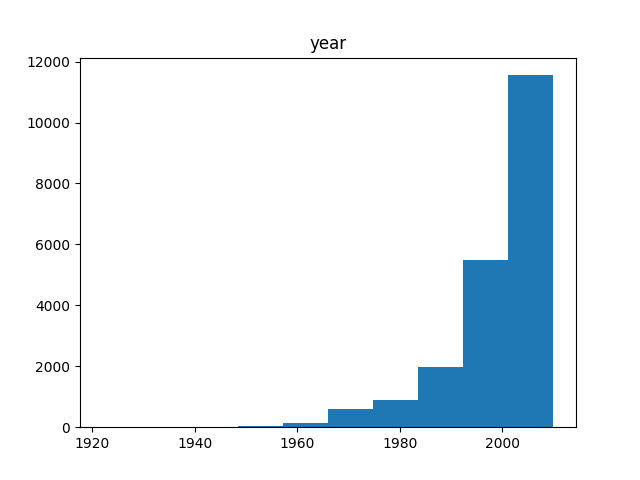

In [37]:
%matplot plt



In [33]:
plt.close()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [10]:
# # Some scatter pair plots would also be interesting to see the correlation between features. ✰2.3(e) Include the plots of the following pairs of features and describe your findings (e.g. what patterns you observe) in your writeup.
# - `song_hotttnesss` against `artist_familiarity`
# - `artist_latitude` against `artist_longitude`
# - `song_hotttnesss` against `year`

# Plotting all data points might explode matplotlib. Think about what simple technique you could use to visualize large datasets while retaining data distribution. ✰2.3(f) In your writeup, briefly describe what you did.

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [53]:
# # YOUR CODE HERE
# FIX BC PANDAS ISNT WORKING
f1 = 'song_hotttnesss'
f2 = 'year'

df1 = df_small[f1]
df2 = df_small[f2]

plt.scatter(df1, df2)
plt.title(f1 + " and " + f2)



# # YOUR CODE HERE

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Text(0.5, 1.0, 'song_hotttnesss and year')

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

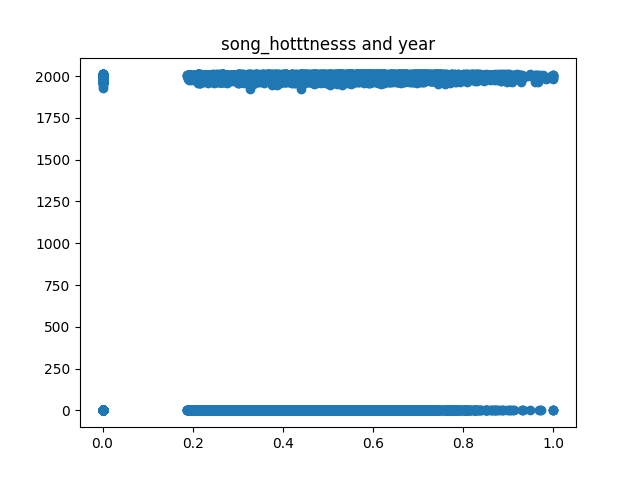

In [54]:
%matplot plt

In [55]:
plt.close()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

### 3. Data Cleaning

From 2, you should have had a basic understanding of the dataset. In this cleaning step, we are dropping `energy` and `danceability` features. 

✰2.4(a) In your writeup, justify why we are doing this.

In [56]:
# YOUR CODE HERE
df_ref = df
df_ref = df_ref.drop('energy', 'danceability')
# df_pandas = df_pandas.drop(['energy', 'danceability'], axis=1)


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

For simplicity, we are dropping `year` values that are less or equal to 1920. Print out the number of samples before and after dropping these rows. 

✰2.4(b) In your writeup, compare these two numbers and explain the advantages and potential problem of doing this step. What other techniques could you use to potentially do better?

In [57]:
# YOUR CODE HERE
#before = 581965
# YOUR CODE HERE
# df_pandas = df_pandas.loc[df_pandas['year'] > 1920]
# df_pandas.info()
df_ref = df_ref.where(df_ref.year>1920)

#df_ref.summary().show()

#after: 4067

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Now, let's do an NaN check to see if there are other problematic features. Print the number of entries that contain NaN for each feature. 

Hint: use pyspark sql `count(when(isnull(...)))` to count total Null entries for a feature. Replace `isnull` with `isnan` to count nan entries.

In [21]:
# count na
# from pyspark.sql.functions import isnan, when, count, isnull

# # YOUR CODE HERE
# df.select([count(when(isnan(c), c)).alias(c) for c in df.columns])#.summary().show()
# # YOUR CODE HERE

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

We should see two features that contain (a lot of) `nan` in them. ✰2.4(c) Which two are they? 

For simplicity, we are dropping all records with `nan` in these two features. Note that this drops a significant proportion of our dataset. Since we have a lot of data to fit some rather simple models, this might be ok. 

However, do note that this is not usually desirable in the real-word because we always want to retain as much data as possible, especially when training larger, more complex models. ✰2.4(d) In your writeup, explain what possible techniques could you employ to deal with this situation. Discuss the pros and cons of your proposed solution.

In [58]:
# YOUR CODE HERE

df_ref = df_ref.na.drop(subset=["artist_latitude","artist_longitude"]) 
#df_ref.summary().show()

# df_pandas = df_pandas.dropna(subset=['artist_latitude', 'artist_longitude'])
# df_pandas.info()

# YOUR CODE HERE

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

✰2.4(e) Finally in your writeup, report the percentage of records that survived our very aggressive data cleaning.

In [18]:
# counting code


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

### 4. Baseline

Now we have the data (almost) ready to do some preliminary modeling! 

We will be treating this problem as a classification problem, i.e. given some features, predict whether a song will be popular. We define a song to be popular if its `song_hotttnesss` value is above average. 

✰2.5(a) Explain in your writeup why treating this as a classification problem (instead of a regression problem) might be a sensible choice. 

Then, assign labels to the dataset with the above definition of "popularity".

In [59]:
df_py = df_ref

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [60]:
from pyspark.sql.functions import col, expr, when

hot = df_py.agg({'song_hotttnesss': 'mean'}).first()[0] #scalar

#df_py =df_py.withColumn("popularity", expr("CASE WHEN song_hotttnesss > {hot} THEN 1 " +
 #          "WHEN song_hotttnesss <= {hot} THEN 0 ELSE 'unknown' END"))

df_py =df_py.withColumn("popularity", expr(f"CASE WHEN song_hotttnesss > {hot} THEN 1 " +
           f"WHEN song_hotttnesss <= {hot} THEN 0 ELSE 'unknown' END"))

df_py = df_py.withColumn("popularity", df_py["popularity"].cast('int'))


label = df_py.select('popularity') #use this later, column object

# assign labels

# YOUR CODE HERE

# YOUR CODE HERE

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Now let's take a look at how balanced the two classes are. ✰2.5(b) Report what percentage of songs are assigned the "popular" label.

In [25]:
# YOUR CODE HERE
# s = df_py.agg({'popularity': 'sum'}).first()[0]
# s
#4941/5933
#1182/2141

# YOUR CODE HERE

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

71137

As how we've been dealing with the `year` feature in earlier assignments, we will shift the feature so that it starts from 0.

✰2.5(c) Explain why we want to do this.

In [61]:
# shift years
# YOUR CODE HERE
s = df_py.agg({'year': 'min'}).first()[0] #scalar

df_py = df_py.withColumn("year", (df_py['year'] - s))

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [62]:
df_numeric = df_py[['song_hotttnesss', 'artist_familiarity', 'artist_hotttnesss', 'artist_latitude', 
                   'artist_longitude', 'duration', 'end_of_fade_in', 'key', 
                   'key_confidence', 'loudness', 'mode', 'mode_confidence', 
                   'start_of_fade_out', 'tempo', 'time_signature', 'time_signature_confidence', 'year']]
df_num = df_numeric.drop('song_hotttnesss')


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [63]:
# assembling vector

from pyspark.ml.feature import VectorAssembler

va = VectorAssembler().setInputCols(df_num.columns).setOutputCol("features")
df_va = va.transform(df_num)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [64]:
# scaling

from pyspark.ml.feature import StandardScaler

standardScaler = StandardScaler()
standardScaler.setInputCol("features")
standardScaler.setOutputCol("scaled")

model = standardScaler.fit(df_va).transform(df_va)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Now let's verify the resulting feature vector is of expected length 16.

In [65]:
# change your variable/column names accordingly
l = model.select('features').take(1)[0].features
print('vector len:',len(l))
assert len(l) == 16

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

vector len: 16

In [66]:
#fix the dataset
# features = list(model.select('scaled').toPandas()['scaled'])
# labels = list(label.toPandas()) # => [1, 2, 3, 4]

features = model.select('scaled').toPandas()
labels = label.toPandas()
new_df = pd.concat([labels, features], axis = "columns") #stacking the dfs side by side
new_df.rename(columns={"popularity": "label", "scaled": "features"}, inplace = True)

data_df = spark.createDataFrame(new_df)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Now, we are really ready to fit some models. 

First, do a train-test split on the dataset, with test ratio 0.2 and seed 10605.

In [74]:
# YOUR CODE HERE
weights = [.8, .2]
seed = 10605
train_data_df, test_data_df = data_df.randomSplit(weights, seed)
train_data_df.cache()
test_data_df.cache()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

DataFrame[label: bigint, features: vector]

We have to select a metric to evaluate our models on. For classification, potential choices include accuracy and AUC. ✰2.5(e) In your writeup, explain the difference between these two metrics and when AUC might be more useful than accuracy.

We will be going with AUC here. Instantiate an AUC Evaluator in the following cell.

In [81]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

# YOUR CODE HERE
bce = BinaryClassificationEvaluator(metricName ='areaUnderROC')

# YOUR CODE HERE

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

We will be fitting two models, logistic regression, and random forest, in the mandatory part. You have the chance go with fancier models in the last section to achieve higher accuracy to earn additional points.

Train a LR and a RF model with default hyperparameters. ✰2.5(f) Calculate the train and test AUC of both models and report them in your writeup.

In [76]:
# Logistic Regression
from pyspark.ml.classification import LogisticRegression

# YOUR CODE HERE

lr = LogisticRegression()
lrModel_base = lr.fit(train_data_df)

train_pred = lrModel_base.transform(train_data_df)
test_pred = lrModel_base.transform(test_data_df)

train_au_roc = bce.setMetricName('areaUnderROC').evaluate(train_pred)
print("Train: {}".format(train_au_roc))

test_au_roc = bce.setMetricName('areaUnderROC').evaluate(test_pred)
print("Test: {}".format(test_au_roc))

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Train: 0.754523481609325
Test: 0.7549510017623408

In [77]:
#LR-baseline
lr_FPR = lrModel_base.summary.roc.select('FPR').collect()
lr_TPR = lrModel_base.summary.roc.select('TPR').collect()

plt.figure(figsize=(5,5))
plt.plot([0, 1], [0, 1], 'r--')
plt.plot(lr_FPR, lr_TPR)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('LR-baseline ROC Curve')

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Text(0.5, 1.0, 'LR-baseline ROC Curve')

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

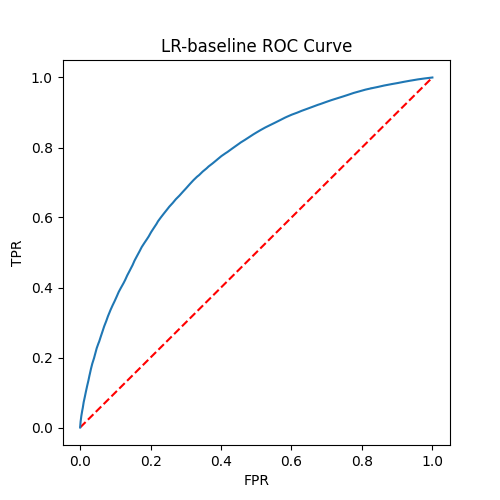

In [78]:
%matplot plt

In [79]:
plt.close('all')

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [80]:
from pyspark.mllib.evaluation import BinaryClassificationMetrics

# Scala version implements .roc() and .pr()
# Python: https://spark.apache.org/docs/latest/api/python/_modules/pyspark/mllib/common.html
# Scala: https://spark.apache.org/docs/latest/api/java/org/apache/spark/mllib/evaluation/BinaryClassificationMetrics.html
class CurveMetrics(BinaryClassificationMetrics):
    def __init__(self, *args):
        super(CurveMetrics, self).__init__(*args)

    def _to_list(self, rdd):
        points = []
        # Note this collect could be inefficient for large datasets 
        # considering there may be one probability per datapoint (at most)
        # The Scala version takes a numBins parameter, 
        # but it doesn't seem possible to pass this from Python to Java
        for row in rdd.collect():
            # Results are returned as type scala.Tuple2, 
            # which doesn't appear to have a py4j mapping
            points += [(float(row._1()), float(row._2()))]
        return points

    def get_curve(self, method):
        rdd = getattr(self._java_model, method)().toJavaRDD()
        return self._to_list(rdd)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [81]:
# Random Forest
from pyspark.ml.classification import RandomForestClassifier

# YOUR CODE HERE
rf = RandomForestClassifier().setLabelCol("label").setFeaturesCol("features")
rfModel_base = rf.fit(train_data_df)

#am i supposed to do this???
train_pred = rfModel_base.transform(train_data_df)

test_pred = rfModel_base.transform(test_data_df)

train_au_roc = bce.setMetricName('areaUnderROC').evaluate(train_pred)
print("Train: {}".format(train_au_roc))

test_au_roc = bce.setMetricName('areaUnderROC').evaluate(test_pred)
print("Test: {}".format(test_au_roc))


#trying to plot ROC score
# Returns as a list (false positive rate, true positive rate)
preds = test_pred.select('label','probability').rdd.map(lambda row: (float(row['probability'][1]), float(row['label'])))
points = CurveMetrics(preds).get_curve('roc')

plt.figure()
x_val = [x[0] for x in points]
y_val = [x[1] for x in points]
plt.title('RF-baseline ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.plot(x_val, y_val)


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Train: 0.7614682368854173
Test: 0.7630133533009626

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

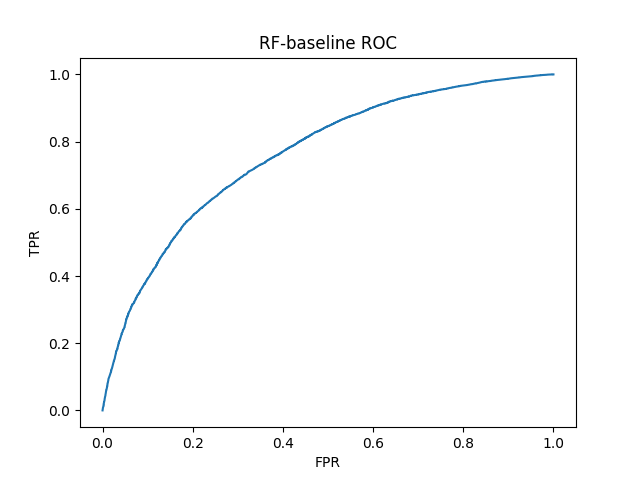

In [82]:
%matplot plt

In [83]:
plt.close('all')

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

### 5. Featurization: Bag-of-Words and TF-IDF

In our list of features, we have two features that contain text data, namely `title` and `artist_terms`. In the entity resolution task of HW1, we've seen how TF-IDF could help us featurize textual data. Let's do that here as well. [Bag-of-Words](https://en.wikipedia.org/wiki/Bag-of-words_model) is yet another technique (arguably simpler than TF-IDF) to featurize text features.


To get yourself familiar with both in Spark, let's treat titles and artist terms as mini documents and compute TF-IDF for `title` and BoW for `artist_terms`.

In [67]:
# tf-idf on title

from pyspark.ml.feature import Tokenizer, HashingTF, IDF

TF_IDF_NUM_FEATS = 5 # HashingTF(..., numFeatures=TF_IDF_NUM_FEATS)

title_df = df_py.select('title')

tokenizer = Tokenizer().setInputCol("title").setOutputCol("words")
wordsData = tokenizer.transform(title_df)

hashingTF = HashingTF().setInputCol("words").setOutputCol("rawFeatures").setNumFeatures(5)

featurizedData = hashingTF.transform(wordsData)


idf = IDF().setInputCol("rawFeatures").setOutputCol("features")
idfModel = idf.fit(featurizedData)

rescaledData = idfModel.transform(featurizedData)
#rescaledData.select( "features").show()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Verify the resulting TF-IDF feature is indeed a vector of length `TF_IDF_NUM_FEATS`.

In [68]:
import pyspark
# change variable/column name to yours
col_name = 'features'
head = rescaledData.select(col_name).head() 
assert type(head[col_name]) == pyspark.ml.linalg.SparseVector
assert len(head[col_name]) == TF_IDF_NUM_FEATS

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Recall that `artist_terms` should be of type string array but we have not yet interpreted from a string literal. Let's do that now. 

Hint: start by defining a UDF to convert a single string literal to type `T.ArrayType(T.StringType())`.

In [69]:
from pyspark.sql.functions import udf
import pyspark.sql.types as T
from pyspark.sql.functions import array

artist_terms_df = df_py.select('artist_terms')
#artist_terms_df.printSchema()

# artist_terms = list(df_py.select('artist_terms').toPandas()['artist_terms'])
# d = {'artist_terms': artist_terms}
# data = pd.DataFrame(data=d)
# data_df = spark.createDataFrame(data)

artist_terms_df = artist_terms_df.withColumn("artist_terms", array(artist_terms_df['artist_terms']))
#artist_terms_df.printSchema()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Let's do a quick check things indeed worked out.

In [70]:
# change to your variable/column names
col_name = 'artist_terms'
head = artist_terms_df.select(col_name).head()
print(head)
assert type(head[col_name]) == list

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Row(artist_terms=["['hardcore punk', 'heavy metal', 'hardcore metal', 'thrash core', 'hard rock', 'death core', 'crossover thrash', 'metalcore', 'nu metal', 'rock', 'melodic black metal', 'thrash metal', 'hardcore', 'melodic death metal', 'power metal', 'screamo', 'progressive metal', 'black metal', 'punk', 'emo', 'death metal', 'hip hop', 'rap', 'alternative rock', 'punk metal', 'united states', 'singer-songwriter', 'metal', 'american', 'new york hardcore', 'alternative', 'germany', 'indie', 'christian', '00s', 'heavy', 'new york', 'crossover', 'new york city', 'old school hardcore', 'drums', 'trash metal', 'beat down']"])

Now perform BoW on the array feature you just created.

✰2.6(a) In your writeup, explain what the `vocabSize` hyperparameter means in the context of Bag-of-Words. Remember you can tune this later in the last section.

In [71]:
# BoW on artist_terms

from pyspark.ml.feature import CountVectorizer

BOW_VOCAB_SIZE = 10 
BOW_MIN_DF = 2

cv = CountVectorizer(inputCol="artist_terms", outputCol="features",vocabSize=BOW_VOCAB_SIZE, minDF=BOW_MIN_DF)
model = cv.fit(artist_terms_df)
result = model.transform(artist_terms_df)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Verify the result of BoW is indeed a vector of length `BOW_VOCAB_SIZE`.

In [72]:
# change variable/column name to yours
col_name = 'features'
head = result.select(col_name).head() 
assert type(head[col_name]) == pyspark.ml.linalg.SparseVector
assert len(head[col_name]) == BOW_VOCAB_SIZE

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

✰2.6(b) Other than featurizing texts, what other feature engineering would you do on the dataset? Briefly describe one in your writeup.

Now with the new feature columns ready, let's assemble and scale our features once again as we did to prepare for training. 

This time, we should have 16+2=18 features with the two being TF-IDF and BoW features we just created. The total length of the resulting feature vector should be 31. ✰2.6(c) Explain where this number (31) comes from in your writeup.

In [73]:
df_final = df_num.toPandas()
df_final['TF_IDF'] = rescaledData.toPandas().features
df_final['BoW'] = result.toPandas().features

final_df = spark.createDataFrame(df_final)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [74]:
# assembling vector
va = VectorAssembler().setInputCols(final_df.columns).setOutputCol("features")
final_va = va.transform(final_df)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [75]:
#scaling
standardScaler = StandardScaler()
standardScaler.setInputCol("features")
standardScaler.setOutputCol("scaled")

model = standardScaler.fit(final_va).transform(final_va)

#model.toPandas().head()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Now let's verify the feature vector is of expected length 31.

In [76]:
# change your variable/column names accordingly
l = model.select('features').take(1)[0].features
print('vector len:',len(l))
assert len(l) == 31

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

vector len: 31

### 6. Modeling with New Features

Now let's fit LR and RF on our new data. As before, first do a train-test split with test ratio 0.2 and seed 10605.

In [77]:
#fix the dataset
features = model.select('scaled').toPandas()
labels = label.toPandas()
new_df = pd.concat([labels, features], axis = "columns") #stacking the dfs side by side
new_df.rename(columns={"popularity": "label", "scaled": "features"}, inplace = True)

data_df = spark.createDataFrame(new_df)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [78]:
# YOUR CODE HERE
weights = [.8, .2]
seed = 10605
train_data_df, test_data_df = data_df.randomSplit(weights, seed)
train_data_df.cache()
test_data_df.cache()


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

DataFrame[label: bigint, features: vector]

Now train the LR and RF model with default hyperparameters. ✰2.7(a) Evaluate train and test AUC for each model and report them in your writeup.

In [97]:
# Logistic Regression
lr = LogisticRegression()
# lr.setRegParam(0.01)
# lr.setMaxIter(100)
lrModel = lr.fit(train_data_df)

test_pred = lrModel.transform(test_data_df)

train_pred = lrModel.transform(train_data_df)

train_au_roc = bce.setMetricName('areaUnderROC').evaluate(train_pred)
print("Train: {}".format(train_au_roc))

test_au_roc = bce.setMetricName('areaUnderROC').evaluate(test_pred)
print("Test: {}".format(test_au_roc))

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Train: 0.763440063362602
Test: 0.7626398894937155

In [98]:
# Random Forest
rf = RandomForestClassifier().setLabelCol("label").setFeaturesCol("features")
rfModel = rf.fit(train_data_df)

test_pred = rfModel.transform(test_data_df)

#am i supposed to do this???
train_pred = rfModel.transform(train_data_df)

train_au_roc = bce.setMetricName('areaUnderROC').evaluate(train_pred)
print("Train: {}".format(train_au_roc))

test_au_roc = bce.setMetricName('areaUnderROC').evaluate(test_pred)
print("Test: {}".format(test_au_roc))


#trying to plot ROC score
# Returns as a list (false positive rate, true positive rate)
preds = test_pred.select('label','probability').rdd.map(lambda row: (float(row['probability'][1]), float(row['label'])))
points = CurveMetrics(preds).get_curve('roc')

plt.figure()
x_val = [x[0] for x in points]
y_val = [x[1] for x in points]
plt.title('RF-new ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.plot(x_val, y_val)



FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Train: 0.7631860914350813
Test: 0.761352108281413

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

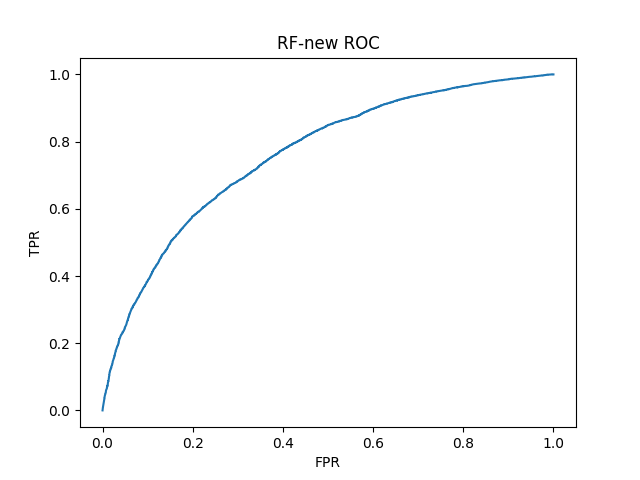

In [99]:
%matplot plt

In [100]:
plt.close('all')

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Recall that AUC is the area under the ROC curve. Now, plot the ROC curves for the four models (including two baselines) in **one single plot**. 

✰2.7(b) In your writeup:
- Include the plot (with legends)
- Explain how the ROC curve is derived and what it measures
- Explain, from the ROC curves, how do you discover which models are performing better than others, and in this case, which model performs the best.

In [101]:
#LR-new
lr_FPR = lrModel.summary.roc.select('FPR').collect()
lr_TPR = lrModel.summary.roc.select('TPR').collect()

plt.figure(figsize=(5,5))
plt.plot([0, 1], [0, 1], 'r--')
plt.plot(lr_FPR, lr_TPR)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('LR-new ROC Curve')
# YOUR CODE HERE

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Text(0.5, 1.0, 'LR-new ROC Curve')

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

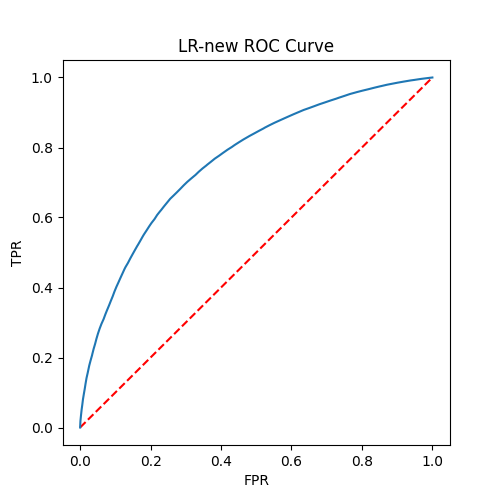

In [102]:
%matplot plt

In [103]:
plt.close('all')

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

### 7. Do Your Best

In all previous sections in this assignment and other assignments so far, we have almost specified everything you should do. You might be (and should be!) bored by now. This section gives you a chance to do whatever you want to improve the prediction AUC. 

You can do better data preprocessing, feature engineering, fit fancier models, perform hyperparameter tuning, etc. 

After you are satisfied with your model, ✰2.8 in your writeup, report 
- the hyperparameters,
- train and test AUC of your optimized model, and 
- the approach you took on top of the specified instructions to obtain this better result.

In [84]:
# Random Forest
from pyspark.ml.classification import RandomForestClassifier

rf = RandomForestClassifier().setLabelCol("label").setFeaturesCol("features").setNumTrees(30).setMaxDepth(5)
rfModel = rf.fit(train_data_df)

test_pred = rfModel.transform(test_data_df)

#am i supposed to do this???
train_pred = rfModel.transform(train_data_df)

train_au_roc = bce.setMetricName('areaUnderROC').evaluate(train_pred)
print("Train: {}".format(train_au_roc))

test_au_roc = bce.setMetricName('areaUnderROC').evaluate(test_pred)
print("Test: {}".format(test_au_roc))


# #trying to plot ROC score
# # Returns as a list (false positive rate, true positive rate)
# preds = test_pred.select('label','probability').rdd.map(lambda row: (float(row['probability'][1]), float(row['label'])))
# points = CurveMetrics(preds).get_curve('roc')

# plt.figure()
# x_val = [x[0] for x in points]
# y_val = [x[1] for x in points]
# plt.title('RF-new ROC')
# plt.xlabel('FPR')
# plt.ylabel('TPR')
# plt.plot(x_val, y_val)



FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Train: 0.8134932824797446
Test: 0.7879892720837928

In [90]:
from pyspark.ml.classification import GBTClassifier

gbt = GBTClassifier(maxIter=10, maxDepth=10) #maxiter=30, maxdepth = 10
gbtModel = gbt.fit(train_data_df)
test_pred = gbtModel.transform(test_data_df)

#am i supposed to do this???
train_pred = rfModel.transform(train_data_df)

train_au_roc = bce.setMetricName('areaUnderROC').evaluate(train_pred)
print("Train: {}".format(train_au_roc))

test_au_roc = bce.setMetricName('areaUnderROC').evaluate(test_pred)
print("Test: {}".format(test_au_roc))

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Train: 0.8134932824797448
Test: 0.8010079271222271

In [110]:
## have fun!
## hyperparamter search: 
## RF: numtrees - 30, maxdepth - 5, auc of 0.7978945573882286
## data_df, train_data_df, test_data_df

from pyspark.ml import Pipeline
from pyspark.ml.tuning import ParamGridBuilder
import numpy as np
from pyspark.ml.tuning import CrossValidator
from pyspark.ml.evaluation import RegressionEvaluator

# gbt = GBTClassifier()
# lr =  LogisticRegression()
# gbtModel = gbt.fit(train_data_df)
# test_pred = gbtModel.transform(test_data_df)

feature_list = []
for col in data_df.columns:
    if col == 'label':
        continue
    else:
        feature_list.append(col)
assembler = VectorAssembler(inputCols=feature_list)

rf = RandomForestClassifier().setLabelCol("label").setFeaturesCol("features")
pipeline = Pipeline(stages=[assembler, rf])

paramGrid = ParamGridBuilder() \
    .addGrid(rf.numTrees, [int(x) for x in np.linspace(start = 10, stop = 50, num = 3)]) \
    .addGrid(rf.maxDepth, [int(x) for x in np.linspace(start = 5, stop = 25, num = 3)]) \
    .build()

cv = CrossValidator(estimator=pipeline, estimatorParamMaps=paramGrid, evaluator=bce, numFolds=5)

cvModel = cv.fit(train_data_df)
test_pred = cvModel.transform(test_data_df)
train_pred = cvModel.transform(train_data_df)


train_au_roc = bce.setMetricName('areaUnderROC').evaluate(train_pred)
print("Train: {}".format(train_au_roc))

test_au_roc = bce.setMetricName('areaUnderROC').evaluate(test_pred)
print("Test: {}".format(test_au_roc))

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

An error was encountered:
Invalid status code '400' from http://ip-172-31-11-40.ec2.internal:8998/sessions/4/statements/110 with error payload: {"msg":"requirement failed: Session isn't active."}


In [58]:
# bestPipeline = cvModel.bestModel
# bestModel = bestPipeline.stages[1]

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [64]:
# ##another try
# ##data_df, train_data_df, test_data_df
# #filtering out 'confidence' features,
# from pyspark.ml.feature import VectorAssembler
# from pyspark.ml.feature import StandardScaler
# from pyspark.ml.evaluation import BinaryClassificationEvaluator
# from pyspark.ml.classification import LogisticRegression

# df_numeric = df_py[['song_hotttnesss', 'artist_familiarity', 'artist_hotttnesss', 'duration', 'key', 
#                    'key_confidence', 'loudness', 'mode', 'mode_confidence',
#                     'tempo', 'time_signature', 'time_signature_confidence', 'year']]
# df_num = df_numeric.drop('song_hotttnesss')


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [65]:
# #new features
# # tf-idf on title

# from pyspark.ml.feature import Tokenizer, HashingTF, IDF
# import pyspark
# from pyspark.sql.functions import udf
# import pyspark.sql.types as T
# from pyspark.sql.functions import array
# from pyspark.ml.feature import CountVectorizer

# TF_IDF_NUM_FEATS = 5 # HashingTF(..., numFeatures=TF_IDF_NUM_FEATS)

# title_df = df_py.select('title')

# tokenizer = Tokenizer().setInputCol("title").setOutputCol("words")
# wordsData = tokenizer.transform(title_df)

# hashingTF = HashingTF().setInputCol("words").setOutputCol("rawFeatures").setNumFeatures(5)

# featurizedData = hashingTF.transform(wordsData)

# idf = IDF().setInputCol("rawFeatures").setOutputCol("features")
# idfModel = idf.fit(featurizedData)

# rescaledData = idfModel.transform(featurizedData)

# artist_terms_df = df_py.select('artist_terms')
# artist_terms_df = artist_terms_df.withColumn("artist_terms", array(artist_terms_df['artist_terms']))

# # BoW on artist_terms
# BOW_VOCAB_SIZE = 30
# BOW_MIN_DF = 2

# cv = CountVectorizer(inputCol="artist_terms", outputCol="features",vocabSize=BOW_VOCAB_SIZE, minDF=BOW_MIN_DF)
# model = cv.fit(artist_terms_df)
# result = model.transform(artist_terms_df)

# df_final = df_num.toPandas()
# df_final['TF_IDF'] = rescaledData.toPandas().features
# df_final['BoW'] = result.toPandas().features

# df_num = spark.createDataFrame(df_final)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [66]:
# va = VectorAssembler().setInputCols(df_num.columns).setOutputCol("features")
# df_va = va.transform(df_num)

# # scaling
# standardScaler = StandardScaler()
# standardScaler.setInputCol("features")
# standardScaler.setOutputCol("scaled")

# model = standardScaler.fit(df_va).transform(df_va)

# features = model.select('scaled').toPandas()
# labels = label.toPandas()
# new_df = pd.concat([labels, features], axis = "columns") #stacking the dfs side by side
# new_df.rename(columns={"popularity": "label", "scaled": "features"}, inplace = True)

# data_df = spark.createDataFrame(new_df)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [67]:
# weights = [.8, .2]
# seed = 10605
# train_data_df, test_data_df = data_df.randomSplit(weights, seed)
# train_data_df.cache()
# test_data_df.cache()

# bce = BinaryClassificationEvaluator(metricName ='areaUnderROC')


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [68]:
# # Random Forest
# from pyspark.ml.classification import RandomForestClassifier

# # YOUR CODE HERE
# rf = RandomForestClassifier().setLabelCol("label").setFeaturesCol("features").setNumTrees(50).setMaxDepth(10)
# rfModel_base = rf.fit(train_data_df)

# #am i supposed to do this???
# train_pred = rfModel_base.transform(train_data_df)

# test_pred = rfModel_base.transform(test_data_df)

# train_au_roc = bce.setMetricName('areaUnderROC').evaluate(train_pred)
# print("Train: {}".format(train_au_roc))

# test_au_roc = bce.setMetricName('areaUnderROC').evaluate(test_pred)
# print("Test: {}".format(test_au_roc))

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Train: 0.7909613486810365
Test: 0.7742623354692018

In [63]:
# # Logistic Regression

# lr = LogisticRegression().setRegParam(0.001).setMaxIter(100)
# lrModel_base = lr.fit(train_data_df)

# train_pred = lrModel_base.transform(train_data_df)
# test_pred = lrModel_base.transform(test_data_df)

# train_au_roc = bce.setMetricName('areaUnderROC').evaluate(train_pred)
# print("Train: {}".format(train_au_roc))

# test_au_roc = bce.setMetricName('areaUnderROC').evaluate(test_pred)
# print("Test: {}".format(test_au_roc))

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Train: 0.7849585271398676
Test: 0.8160508033925755

In [75]:
Train: 0.8134932824797453
Test: 0.81965357772701

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

An error was encountered:
type object 'SVMModel' has no attribute 'train'
Traceback (most recent call last):
AttributeError: type object 'SVMModel' has no attribute 'train'



### 8. Don't forget to answer the reflection question on the writeup! ✰2.9

In [66]:
# Train: 0.8386375487558138
# Test: 0.8093167966585688
    
# Train: 0.7766361443102573
# Test: 0.8231257724928612

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…